In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

In [43]:
df3 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_9min.xlsx')
df8 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_9min.xlsx')
df3 = thermo_df(df3)
df8 = thermo_df(df8)
df3.shape, df8.shape

((1658, 3), (1672, 3))

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

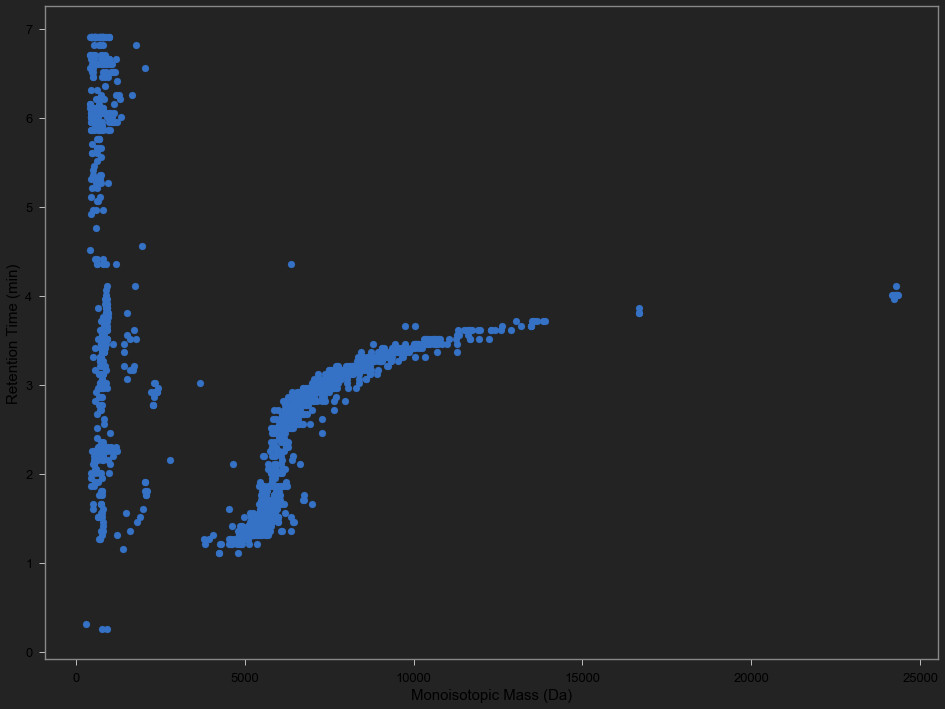

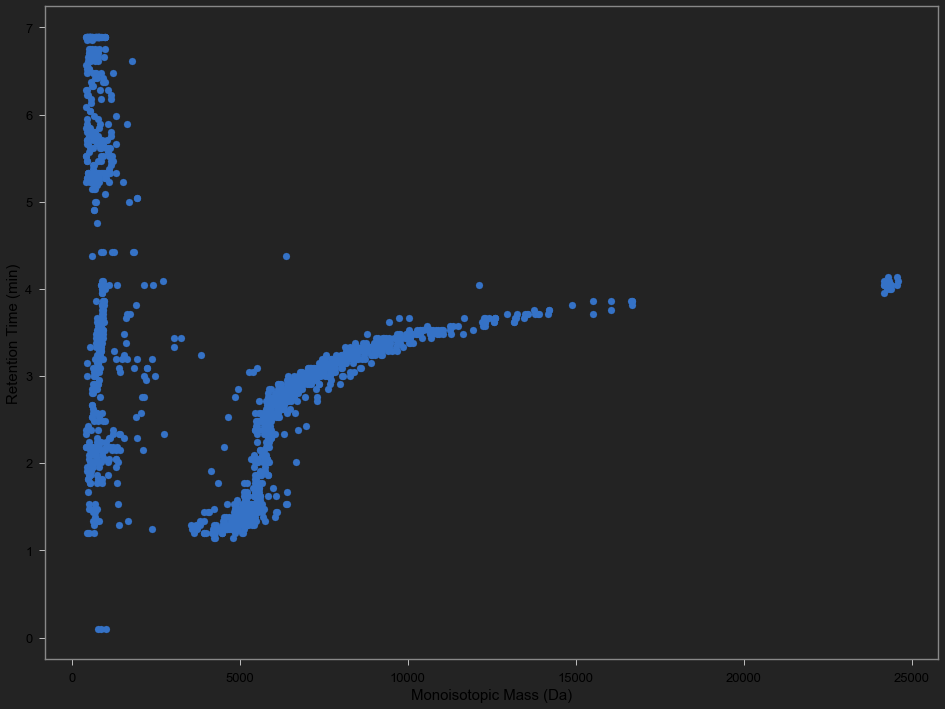

In [44]:
plot_zone(df3)
plot_zone(df8)

In [3]:
df2 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df7 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df2 = thermo_df(df2)
df7 = thermo_df(df7)
df2.shape, df7.shape

((4593, 3), (2727, 3))

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

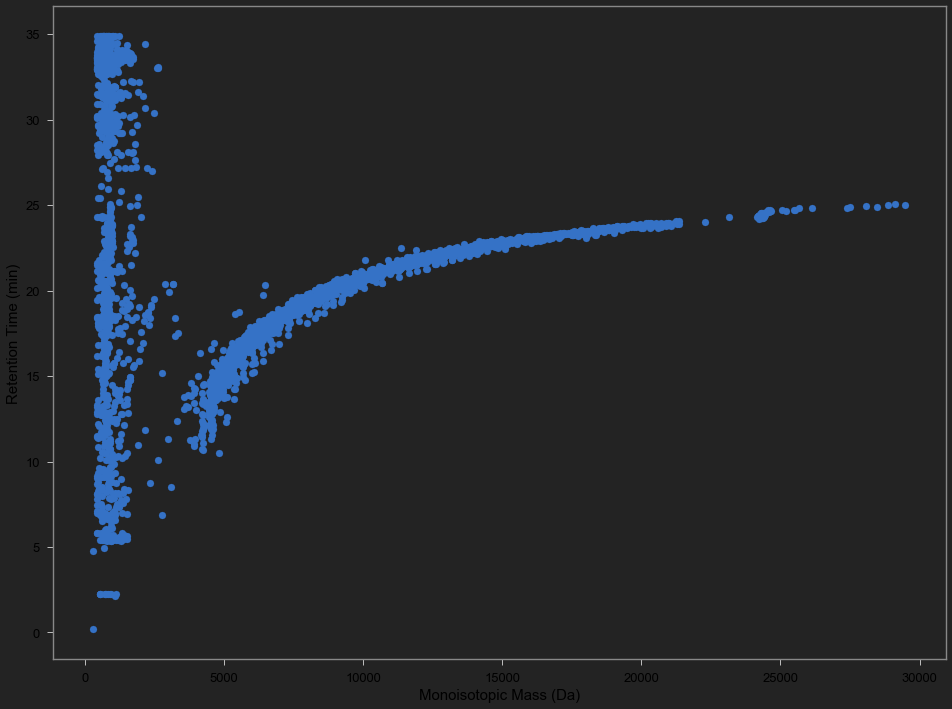

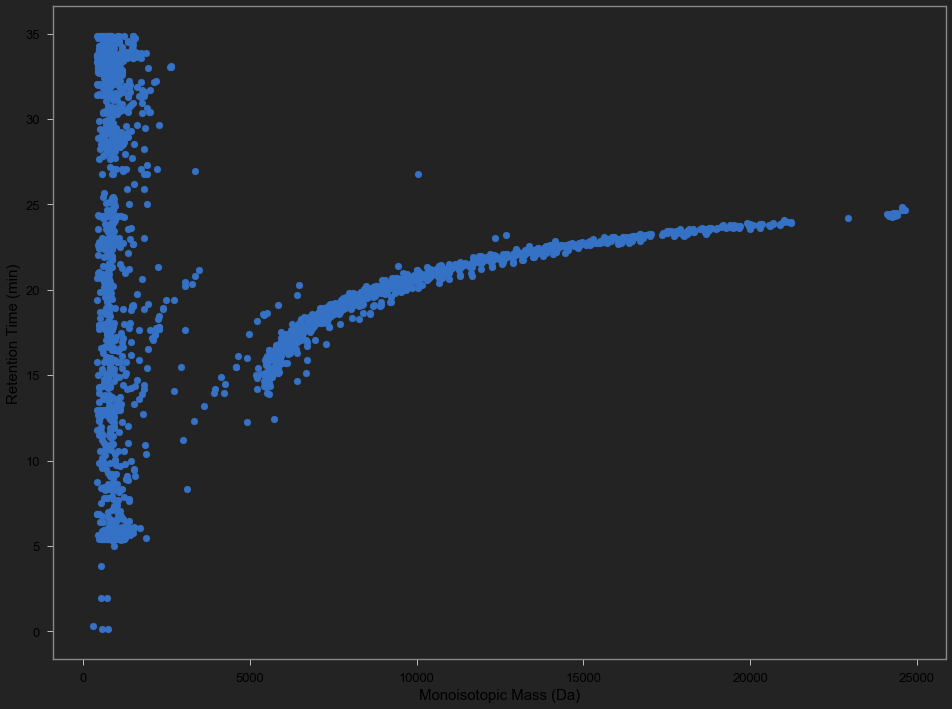

In [4]:
plot_zone(df2)
plot_zone(df7)

In [45]:
df2_25k = df2[(df2.Mass > 24000) & (df2.Mass < 25000)]
plotly_zone(df2_25k, y='Vol')

In [6]:
df7_25k = df7[(df7.Mass > 24000) & (df7.Mass < 25000)]
plotly_zone(df7_25k, y='Vol')

In [7]:
df2_big = df2[df2.Mass>22000].sort_values('Vol', ascending=False)[:20][['Mass', 'Vol', 'RT']]
df2_big # 2

,Mass,Vol,RT
767,24203.244116,620152.37,24.382291
781,24189.233530,616248.16,24.382291
866,24303.228702,549354.77,24.323343
909,24217.272292,521214.74,24.201517
992,24246.225823,469149.93,24.323343
1200,24260.185909,344761.48,24.323343
1298,24317.210717,309256.43,24.323343
1481,24274.209933,232518.75,24.257827
1527,24359.194944,221241.70,24.382291
1536,24231.253775,220246.28,24.323343


In [8]:
df7_big = df7[df7.Mass>22000].sort_values('Vol', ascending=False)[:10][['Mass', 'Vol', 'RT']]
df7_big # 0, 

,Mass,Vol,RT
929,24217.243539,422837.02,24.322452
991,24203.231085,390638.21,24.387363
1057,24189.222217,361732.81,24.387363
1131,24303.227782,311988.65,24.387363
1515,24231.226603,156115.21,24.322452
1572,24260.184580,147623.99,24.447681
1627,24274.188285,139890.88,24.322452
1844,24245.238148,106425.46,24.322452
1876,24246.242980,102726.86,24.387363
1923,24317.218866,96051.43,24.447681


In [78]:
df_ms_2_tmp = df7.copy()
df_ms_2_tmp.Mass -= M
df_comm_pre_methyl = match_dfs(df_ms_2_tmp, df_ms_1)

df_ms_1_tmp = df7.copy()
df_ms_1_tmp.Mass += M
df_comm_post_methyl = match_dfs(df_ms_1_tmp, df_ms_2)

df_A = pd.concat([df_comm, df_comm_pre_methyl])
#     plotly_zones(df_comm, df_comm_pre_methyl, title='Pre Methyl')
df_B = pd.concat([df_comm, df_comm_post_methyl])
plotly_zone(df_B)

In [11]:

AminoAcid = 128.94
def handle_methyl(df, intact_mass_a, intact_mass_b):
    df_ms_1, _ = computational_data_seperation(df, df, full_mass=intact_mass_a, ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df, df, full_mass=intact_mass_b, ignore_endpoints=True)
    df_comm = df_ms_1[df_ms_1.Mass.isin(df_ms_2.Mass)]
#     plotly_zone(df_comm, title='Common Dots')
    df_ms_2_tmp = df_ms_2.copy()
    df_ms_2_tmp.Mass -= M
    df_comm_pre_methyl = match_dfs(df_ms_2_tmp, df_ms_1)
    
    df_ms_1_tmp = df_ms_1.copy()
    df_ms_1_tmp.Mass += M
    df_comm_post_methyl = match_dfs(df_ms_1_tmp, df_ms_2)

    df_A = pd.concat([df_comm, df_comm_pre_methyl])
#     plotly_zones(df_comm, df_comm_pre_methyl, title='Pre Methyl')
    df_B = pd.concat([df_comm, df_comm_post_methyl])
#     plotly_zones(df_comm, df_comm_post_methyl, title='Post Methyl')

    return df_A, df_B

In [17]:
def comm_dots(df1, df2, intact_mass):
    df_ms_1, _ = computational_data_seperation(df1, df1, full_mass=intact_mass, ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df2, df2, full_mass=intact_mass, ignore_endpoints=True)
    df_comm = match_dfs(df_ms_2, df_ms_1)
    return df_comm

In [71]:
# common dots for methyled intact mass pairs
masses = [24189.23, 24203.24, 24217.27, 24231.25]
# masses = [24288.17982, 24302.1913, 24316.12684, 24330.1247, 24344.13365]
# masses = [24189.22295, 24203.25458, 24245.22615]
df2_A, df2_B = handle_methyl(df2, masses[0], masses[1])
df7_A, df7_B = handle_methyl(df7, masses[0], masses[1])
df2_A.shape, df2_B.shape, df7_A.shape, df7_B.shape

full_mass 24189.23 sum_value 24207.2
full_mass 24203.24 sum_value 24221.3
full_mass 24189.23 sum_value 24207.2
full_mass 24203.24 sum_value 24221.3


((192, 3), (192, 3), (45, 3), (45, 3))

In [73]:
df27_A, df27_B = handle_methyl(df_27, masses[0], masses[1])
df27_A.shape, df27_B.shape

full_mass 24189.23 sum_value 24207.2
full_mass 24203.24 sum_value 24221.3


((15, 3), (15, 3))

In [80]:
plotly_zone(df2_A)
plotly_zone(df2_B)
plotly_zones(df7_A, df7_B)

In [84]:
components(12945.67 - 11661.49)
# components(12545.76 - 11261.56)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
103,1,2,1,0,0,0,0,1284.1825,-0.0025
231,2,0,0,2,0,0,1,1284.1712,0.0088


In [69]:
df_A = match_dfs(df7_A, df2_A)
plotly_zone(df_A)
df_B = match_dfs(df7_B, df2_B)
plotly_zone(df_B)
plotly_zones(df_A, df_B)

In [106]:
df_mass1 = comm_dots(df2, df7, masses[1])
plotly_zone(df_mass1)
# df_mass2 = comm_dots(df2, df7, masses[1])
# plotly_zone(df_mass2)
# df_mass3 = comm_dots(df2, df7, masses[2])
# plotly_zone(df_mass3)
# df_mass4 = comm_dots(df2, df7, masses[3])
# plotly_zone(df_mass4)
# plotly_zones(df_mass1, df_mass2)

full_mass 24203.24 sum_value 24221.3
full_mass 24203.24 sum_value 24221.3


In [105]:
df_ms_1, _ = computational_data_seperation(df2, df2, full_mass=masses[0], ignore_endpoints=True)
df_ms_2, _ = computational_data_seperation(df7, df7, full_mass=masses[0], ignore_endpoints=True)
plotly_zone(df_ms_1)
plotly_zone(df_ms_2)

full_mass 24189.23 sum_value 24207.2
full_mass 24189.23 sum_value 24207.2


In [98]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_mass2
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

points [1, 5, 9, 10, 12, 13, 18, 21, 23, 27, 31, 32, 33]


In [99]:
df_zone = df_sample.iloc[idxs]
df_zone.sort_values('Mass')

,Mass,RT,Vol
11620,10682.413488,21.261000,6014.32
2525,11050.409072,21.261000,84093.42
2607,11356.428024,21.446868,79695.44
2341,11661.489142,21.570453,95441.93
13980,11932.586608,21.640214,3919.85
7457,12288.639388,21.694512,13856.06
4837,12559.803278,21.944193,27035.41
7290,12864.829319,22.014144,14335.23
6560,13170.820895,22.140409,17231.81
8568,13538.785232,22.321147,10589.09


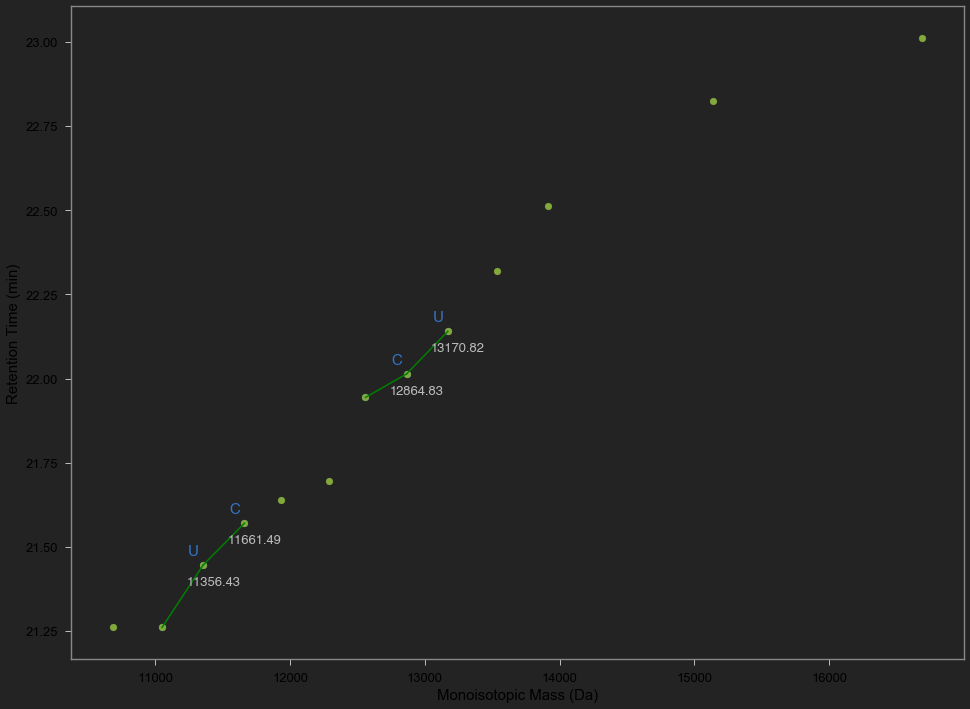

In [101]:
bcr = base_calling_random(df_zone, silence=True)
plt, _ = plot_basecalling(*bcr)
plt.scatter(df_zone.Mass, df_zone.RT)

In [33]:
# df_27 = pd.concat([df2, df7]).drop_duplicates()
df_27 = match_dfs(df7, df2)

In [35]:
df_skeletons = list()
for idx in range(len(masses)):
    df_skeleton, _ = computational_data_seperation(df_27, df_27, full_mass=masses[idx], ignore_endpoints=True)
    df_skeletons.append(df_skeleton)

full_mass 24189.23 sum_value 24207.2
full_mass 24203.24 sum_value 24221.3
full_mass 24217.27 sum_value 24235.3
full_mass 24231.25 sum_value 24249.3


In [52]:
df_skeleton_24217, _ = computational_data_seperation(df7, df7, full_mass=masses[2], ignore_endpoints=True)
plotly_zone(df_skeleton_24217)

full_mass 24217.27 sum_value 24235.3


In [62]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_skeleton_24217
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

points [15, 17, 24, 30, 33, 48, 62, 93, 103]


In [63]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(9, 3)

In [66]:
df_mid_3p = df_chosen.copy()
df_mid_3p.sort_values('Mass')

,Mass,RT,Vol
3362,10679.545799,20.419922,15510.28
5986,10984.594356,20.613062,3627.80
3702,11289.635447,20.805183,11436.66
3922,11634.675682,21.002718,9514.11
4501,11939.674684,21.199780,6817.15
3908,12244.781004,21.326469,9596.96
3158,12573.827710,21.588225,19749.63
4184,12878.861163,21.651378,8203.69
3665,13184.889175,21.722048,11738.76


In [59]:
df_mid = df_chosen.copy()
df_mid_core = filter_dots_in_mid_gap(df_mid)
df_mid_core.shape

Filtering dots:  3502     14205.805929
9638     13946.898358
9645     11862.543437
5684     17692.435959
9665     12627.667375
3562     12945.640203
9696     11997.587512
7803     10959.381887
5757     18308.535702
7821     16694.247279
9722     10233.340832
5811     20603.830358
7910     11370.530636
5863     10672.416150
7917     16154.209408
9868     10361.351177
8014     13577.878893
9901     17375.320221
9951     16098.168734
8084     13275.772754
8098     18786.452140
6053     17706.534172
8107     10657.423825
6087     18164.416550
8172     12310.660651
4004     17514.279348
10099    17473.346194
8249     13873.898968
10148    15179.017898
4166     15200.960267
             ...     
8758     18330.547357
8761     18693.501037
8766     13562.852935
2655     11661.459458
8862     14001.871617
4753     16052.246997
4809     18294.526821
2802     11050.384015
2819     11356.417300
9045     11328.525614
7080     15184.025901
4973     14894.909266
9097     16543.175614
9124     10351.

(18, 3)

In [61]:
plotly_zones(df_mid, df_mid_core)
plotly_zone(df_mid_core)

In [56]:
components(5541.719 - 4571.528)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
80,0,1,1,1,0,0,1,970.1296,0.0614
138,1,1,0,0,1,0,2,970.1660,0.0250


In [42]:
plotly_multi_zones(df_skeletons[2:3])
masses[2]

24217.27

In [109]:
# common dots in sample2 and sample7
masses = [24189.23, 24203.24, 24217.27, 24231.25]
# masses = [24288.17982, 24302.1913, 24316.12684, 24330.1247, 24344.13365]
# masses = [24189.22295, 24203.25458, 24245.22615]

AminoAcid = 128.94
df_comms = list()
for mass in masses:
    df_ms_1, _ = computational_data_seperation(df2, df2, full_mass=mass, ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df7, df7, full_mass=mass, ignore_endpoints=True)
    df_comm = match_dfs(df_ms_1, df_ms_2)
    df_comms.append(df_comm)
#     plotly_zone(df_ms_1)
#     plotly_zone(df_ms_2)
    plotly_zone(df_comm)
    

full_mass 24189.23 sum_value 24207.2
full_mass 24189.23 sum_value 24207.2


full_mass 24203.24 sum_value 24221.3
full_mass 24203.24 sum_value 24221.3


full_mass 24217.27 sum_value 24235.3
full_mass 24217.27 sum_value 24235.3


full_mass 24231.25 sum_value 24249.3
full_mass 24231.25 sum_value 24249.3


# 24189 Sample2

In [108]:
plotly_zone(df_comms[0])

NameError: name 'df_comms' is not defined

In [14]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_comms[0]
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

In [15]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(14, 3)

In [17]:
df_24189 = df_sample.drop(df_chosen.index).copy()
df_24189.shape

(16, 3)

In [179]:
df_sample = df_comms[0]
df_24189_3p = df_sample.drop(df_24189.index)
plotly_zones(df_24189, df_24189_3p)

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [181]:
df_24189['is5p'] = True
df_24189_3p['is5p'] = False
df_merge_24189 = pd.concat([df_24189, df_24189_3p])

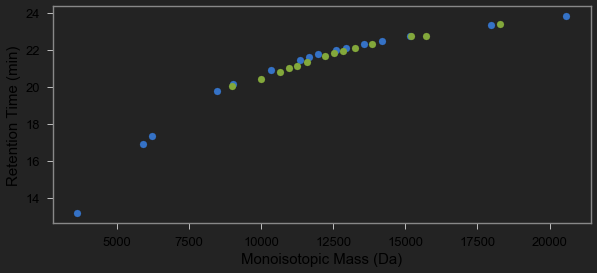

In [185]:
# df_merge_24189.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/GraphsOutput/24189')
plt, fig = local_plot_zones(df_24189, df_24189_3p)
output(df_merge_24189, plt, fig, 1, 'mass_sum')

In [170]:
plotly_zone(df_24189)

In [26]:
full_mass = masses[0]
fullmass_dot = df2[(df2.Mass>full_mass-0.1) & (df2.Mass<full_mass+0.1)]
df_gap_dots = find_gap_dots(df2, df_24189, fullmass_dot, orientation=5)
df_gap_dots.shape

Processing forward 3631.4125553917
components 3631.4125553917-97.9769
keep this dot 3631.4125553917
397.9769 3331.4125553917 1.0219873235000938 12.183134603491013
Processing the gap 97.9769-3631.4125553917, 208 dots
extend dots                Mass         RT        Vol
639     615.956675   7.013306  749992.09
676     617.995656  11.453027  714407.65
1856    426.974983  11.453027  159272.45
4150   1317.193918   5.820545   34238.03
6597    669.084349   5.505789   17112.77
6640   2635.289590  10.078039   16938.05
6875   2980.336724  11.320499   15900.50
15340  2329.262070   8.752750    2994.64
15527   708.106366   6.002773    2859.22
19328  2159.307056  11.817482     818.69
19696  1551.233873   8.322030     498.17
Processing forward 5912.69982723381
components 5912.69982723381-3631.4125553917
keep this dot 5912.69982723381
3931.4125553917 5612.69982723381 13.591024003803499 16.5197648850641
Processing the gap 3631.4125553917-5912.69982723381, 376 dots
extend dots                Mass      

extend dots                Mass         RT       Vol
3680  13250.709059  22.264293  40910.71
4782  12945.670448  22.194361  27395.46
Processing forward 14205.8059294037
components 14205.8059294037-13555.7350662739
keep this dot 14205.8059294037
13855.7350662739 13905.8059294037 22.295863551102663 22.51089300605992
Processing the gap 13555.7350662739-14205.8059294037, 7 dots
No dots found in these gaps.
Processing forward 15179.0178979008
components 15179.0178979008-14205.8059294037
keep this dot 15179.0178979008
14505.8059294037 14879.0178979008 22.48137666852852 22.781440465073008
Processing the gap 14205.8059294037-15179.0178979008, 47 dots
No dots found in these gaps.
Processing forward 17986.4805967893
components 17986.4805967893-15179.0178979008
keep this dot 17986.4805967893
15479.0178979008 17686.4805967893 22.723906988376545 23.380351168574766
Processing the gap 15179.0178979008-17986.4805967893, 194 dots
extend dots                 Mass         RT      Vol
9574   16196.158838 

(256, 3)

In [107]:
plotly_zones(df_24189, df_gap_dots)
# plt = plot_zones(df_skeleton, df_gap_dots)
# plt.savefig('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/II/Phe_MFE0724/{}/{}_5p.png'.format(group, int(full_mass)), transparent=True)

NameError: name 'df_24189' is not defined

In [30]:
df_merge = pd.concat([df_24189, df_gap_dots]).drop_duplicates()


In [32]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_merge
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

points [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 21, 22, 23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 40, 44, 45, 52, 53, 56, 60, 61, 62, 63, 64, 65, 66, 67, 70, 71, 73, 76, 79, 81, 82, 83, 84, 85, 91, 93, 94, 101, 104, 105, 110, 114, 119, 120, 121, 123, 126, 132, 134, 137, 139, 140, 141, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 159, 161, 162, 163, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271]


In [33]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(186, 3)

In [40]:
plotly_zone(df_chosen)

(<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1152x864 with 1 Axes>)

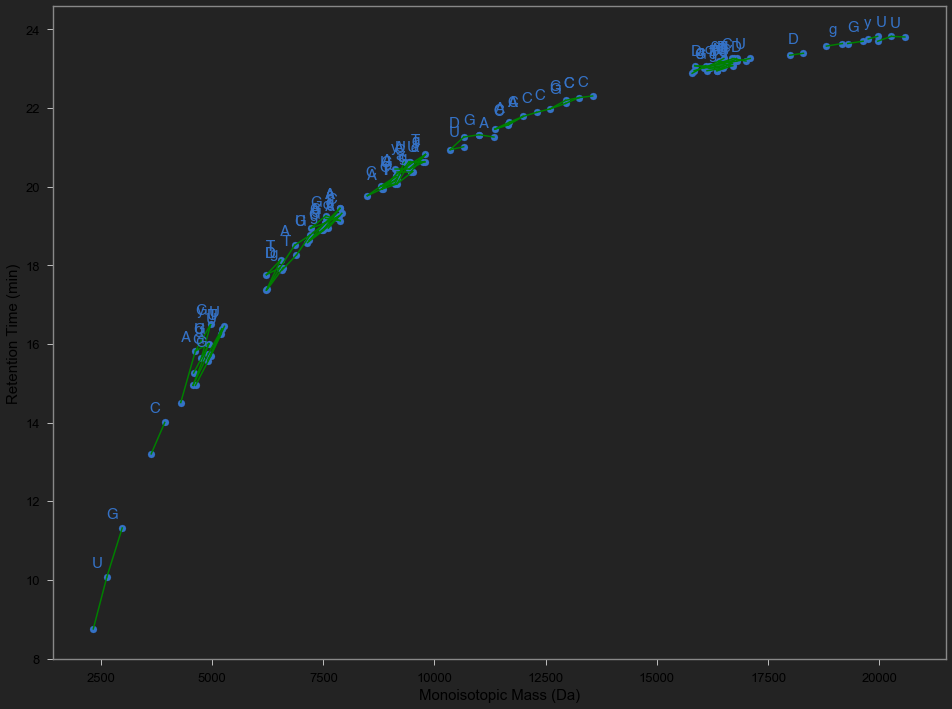

In [42]:
bcr = base_calling_random(df_chosen, silence=True)
plot_basecalling(*bcr, annotate=False)

In [41]:
group = 'Group_24189'
df_seats = process_mass_base_seats(df_merge, bcr[1], full_mass=full_mass)
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/seats_{}_5p.xlsx'.format(group, int(full_mass)))
df_merge.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/{}_5p.xlsx'.format(group, int(full_mass)))

# 24189 Sample7

In [361]:
%run ../../modules/utils.ipynb

In [364]:
full_mass = masses[0]
fullmass_dot_7 = df7[(df7.Mass>full_mass-0.1) & (df7.Mass<full_mass+0.1)]
df_gap_dots_7 = find_gap_dots(df7, df_24189, fullmass_dot, orientation=5)
df_gap_dots_7.shape

Processing forward 3631.4125553917
components 3631.4125553917-97.9769
keep this dot 3631.4125553917
397.9769 3331.4125553917 1.0219873235000938 12.183134603491013
Processing the gap 97.9769-3631.4125553917, 211 dots
Filtering dots:  381      615.956136
2256    1317.193816
2293     653.089868
4995     708.106333
7530    1037.159331
8148    2980.336030
9598    1022.164847
Name: Mass, dtype: float64
reserved masses:  [1037.15933134992, 708.106332829556, 2980.33602971743]
extend dots               Mass         RT      Vol
4995   708.106333   5.856979  5348.26
7530  1037.159331   6.635603  2069.83
8148  2980.336030  11.191338  1652.70
Processing forward 5912.69982723381
components 5912.69982723381-3631.4125553917
keep this dot 5912.69982723381
3931.4125553917 5612.69982723381 13.591024003803499 16.5197648850641
Processing the gap 3631.4125553917-5912.69982723381, 45 dots
Filtering dots:  1584    5222.604196
1699    5567.649877
3002    4242.478528
3725    3936.453155
5704    4571.528412
6350

extend dots                Mass         RT      Vol
7900  21226.928951  23.936429  1830.69
8493  20895.863622  23.863794  1470.97
8819  21225.830637  23.994354  1287.28
9710  22932.060609  24.190040   761.27
[4995, 7530, 8148, 1584, 1699, 3002, 3725, 5704, 9872, 4010, 4365, 5830, 6177, 7202, 8364, 6094, 7052, 8850, 9987, 3562, 5579, 5419, 9901, 9951, 10142, 4809, 6584, 7474, 8636, 7900, 8493, 8819, 9710, 781]


(34, 3)

In [363]:
df_mid = dots_in_mid_gap(df7, 13555.735066273, 14205.8059294037)
# df_mid = df_mid.sort_values('Mass', ascending=False)
df_mid_core = filter_dots_in_mid_gap(df_mid)
df_mid_core

13855.7350662739 13905.8059294037 22.295863551102663 22.51089300605992
Processing the gap 13555.7350662739-14205.8059294037, 4 dots
No dots found in these gaps.


""


In [367]:
plotly_zones(df_24189, df_gap_dots_7[df_gap_dots_7.RT < 30])

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [369]:
df_24189.head()

,Mass,RT,Vol,is5p
3502,14205.805929,22.500942,13887.12,True
3562,12945.640203,22.116610,13357.05,True
3839,8489.055301,19.769048,10130.23,True
1993,5912.699827,16.906667,89559.17,True
10148,15179.017898,22.761875,387.77,True


In [370]:
df_m = pd.concat([df_24189[['Mass', 'RT', 'Vol']], df_gap_dots_7[df_gap_dots_7.RT < 30]]).drop_duplicates()
bcr = base_calling_random(df_m, silence=True)
df_seats = process_mass_base_seats(df_m, bcr[1], full_mass=masses[0])
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/GraphsOutput/seats_{}_5p_core.xlsx'.format(int(full_mass)))

In [371]:
# df_mid = dots_in_mid_gap(df7, 12600.63, 13555.74)
df_mid = dots_in_mid_gap(df7, 5912.7, 8489.055)
df_mid = df_mid.sort_values('Mass', ascending=False)
df_mid_core = filter_dots_in_mid_gap(df_mid)
df_mid_core

6212.69982723381 8189.055300930981 17.139972766760888 19.535741939755297
Processing the gap 5912.69982723381-8489.05530093098, 338 dots
Filtering dots:  6247     8183.095838
7867     7879.061527
5226     7877.991540
2627     7875.984460
8364     7860.985497
7605     7839.049261
7034     7838.068600
5286     7822.049781
7863     7666.012598
10087    7642.972728
9396     7573.024974
5102     7559.959559
2078     7546.937363
6065     7545.942724
7835     7540.992757
5606     7533.955272
7202     7516.000982
6237     7358.946267
9677     7319.013342
9127     7263.001245
6927     7227.998711
5531     7218.981105
4360     7214.907372
8605     7203.957324
3036     7202.886831
2274     7201.887436
4131     7198.911663
9461     7196.931926
8132     7193.967780
7143     7189.952994
4010     7186.932933
4092     7183.895412
3277     7171.959067
4493     7147.969400
7846     7135.949330
3454     7131.954251
4906     7119.941591
9559     6922.934308
8087     6913.951302
8062     6906.955419
8633   

,Mass,RT,Vol
5286,7822.049781,19.250066,4794.94
7202,7516.000982,18.596429,2309.34
4010,7186.932933,18.215408,9061.43
4365,6881.909425,17.817821,7338.03
6177,6536.896151,17.561038,3360.89
5830,6217.746706,17.370527,3854.35


In [261]:
df_mid

,Mass,RT,Vol
7474,20270.785414,23.805825,2105.46
3741,19963.734188,23.734288,10980.87
6172,19291.639619,23.603668,3377.98
9626,18994.589905,23.603668,817.18
8636,18653.564399,23.415372,1394.01
6584,18639.561460,23.545596,2924.17
4809,18294.526821,23.415372,5848.80


In [262]:
df_x = df_mid.Mass.copy()
df_y = df_mid.Mass.copy()
np_x = np.array(df_x)
np_y = np.array(df_y)

In [263]:
np_xy = np_x[:, np.newaxis] - np_y
np_xy

array([[    0.        ,   307.05122548,   979.14579461,  1276.19550825,
         1617.22101506,  1631.22395398,  1976.25859258],
       [ -307.05122548,     0.        ,   672.09456913,   969.14428276,
         1310.16978958,  1324.1727285 ,  1669.2073671 ],
       [ -979.14579461,  -672.09456913,     0.        ,   297.04971364,
          638.07522045,   652.07815937,   997.11279798],
       [-1276.19550825,  -969.14428276,  -297.04971364,     0.        ,
          341.02550682,   355.02844573,   700.06308434],
       [-1617.22101506, -1310.16978958,  -638.07522045,  -341.02550682,
            0.        ,    14.00293892,   359.03757752],
       [-1631.22395398, -1324.1727285 ,  -652.07815937,  -355.02844573,
          -14.00293892,     0.        ,   345.03463861],
       [-1976.25859258, -1669.2073671 ,  -997.11279798,  -700.06308434,
         -359.03757752,  -345.03463861,     0.        ]])

In [307]:

def soft_connected(mass_diff):
    if mass_diff <= 0:
        return False
    df = components(mass_diff)
    return not df.empty
comp_vec = np.vectorize(soft_connected)

In [308]:
np_conns = comp_vec(np_xy)
df_conns = pd.DataFrame(np_conns)
df_conns

,0,1,2,3,4,5,6
0,False,False,True,True,True,True,True
1,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True
5,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False


In [324]:
idx_pairs = list(df_conns[df_conns == True].stack().index)
print(idx_pairs)
# df_mid.iloc[idx_pairs[0][0]], df_mid.iloc[idx_pairs[0][1]]

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (4, 5), (4, 6), (5, 6)]


In [326]:
def zip_list(G):
    node_count_list = [(node, len(G.edges(node))) for node in G.nodes]
    node_count_list.sort(key=lambda x: x[1])
    return node_count_list

In [342]:
import networkx as nx
G = nx.Graph()
for pair in idx_pairs:
    a = df_mid.iloc[pair[0]].Mass
    b = df_mid.iloc[pair[1]].Mass
#     if pair[0] == 1:
#         continue
    G.add_edge(a, b)

In [343]:

while True:
    l = zip_list(G)
    print(l)
    max_edges = l[-1][1]
    if l[0][1] >= max_edges:
        break
    G.remove_node(l[0][0])
l = zip_list(G)
print('final: ', l)

[(19291.6396189747, 2), (18994.5899053366, 2), (18653.5643985208, 4), (18639.5614596049, 4), (18294.5268209995, 4), (20270.7854135833, 5), (19963.7341881007, 5)]
[(18994.5899053366, 2), (20270.7854135833, 4), (18653.5643985208, 4), (18639.5614596049, 4), (18294.5268209995, 4), (19963.7341881007, 4)]
[(20270.7854135833, 3), (19963.7341881007, 3), (18653.5643985208, 4), (18639.5614596049, 4), (18294.5268209995, 4)]
[(18653.5643985208, 3), (18639.5614596049, 3), (18294.5268209995, 3), (19963.7341881007, 3)]
final:  [(18653.5643985208, 3), (18639.5614596049, 3), (18294.5268209995, 3), (19963.7341881007, 3)]


In [346]:
def soft_connected(mass_diff):
    if mass_diff <= 0:
        return False
    df = components(mass_diff)
    return not df.empty
comp_vec = np.vectorize(soft_connected)

def zip_list(G):
    node_count_list = [(node, len(G.edges(node))) for node in G.nodes]
    node_count_list.sort(key=lambda x: x[1])
    return node_count_list

import networkx as nx
def filter_dots_in_mid_gap(df):
    df_x = df.Mass.copy()
    df_y = df.Mass.copy()
    np_x = np.array(df_x)
    np_y = np.array(df_y)
    np_xy = np_x[:, np.newaxis] - np_y
#     np_xy

    np_conns = comp_vec(np_xy)
    df_conns = pd.DataFrame(np_conns)
#     df_conns

    idx_pairs = list(df_conns[df_conns == True].stack().index)
#     print(idx_pairs)
    # df_mid.iloc[idx_pairs[0][0]], df_mid.iloc[idx_pairs[0][1]]

    G = nx.Graph()
    for pair in idx_pairs:
        a = df_mid.iloc[pair[0]].Mass
        b = df_mid.iloc[pair[1]].Mass
    #     if pair[0] == 1:
    #         continue
        G.add_edge(a, b)

    while True:
        l = zip_list(G)
#         print(l)
        max_edges = l[-1][1]
        if l[0][1] >= max_edges:
            break
        G.remove_node(l[0][0])
    l = zip_list(G)
#     print('final: ', l)
    masses = [node[0] for node in l]
    print('reserved masses: ', masses)
    return df[df.Mass.isin(masses)]

In [356]:
%run ../../modules/utils.ipynb
df_mid_core = filter_dots_in_mid_gap(df_mid)
df_mid_core

Filtering dots:  8857    11022.475829
8002    10978.461087
8448    10709.422177
Name: Mass, dtype: float64


""


In [317]:
# scc = nx.kosaraju_strongly_connected_components(G)
# nx.is_strongly_connected(G)
scc = nx.connected_components(G)

In [318]:
list(scc)

[{18294.5268209995,
  18639.5614596049,
  18653.5643985208,
  18994.5899053366,
  19291.6396189747,
  19963.7341881007,
  20270.7854135833}]

In [266]:
df_mid

,Mass,RT,Vol
7474,20270.785414,23.805825,2105.46
3741,19963.734188,23.734288,10980.87
6172,19291.639619,23.603668,3377.98
9626,18994.589905,23.603668,817.18
8636,18653.564399,23.415372,1394.01
6584,18639.561460,23.545596,2924.17
4809,18294.526821,23.415372,5848.80


In [217]:
df_comp = components(13555.74 - 12600.63)
not df_comp.empty

True

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




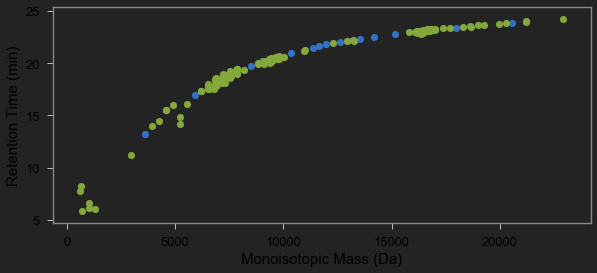

In [188]:
df_a = df_24189.copy()
df_b = df_gap_dots_7[df_gap_dots_7.RT < 30].copy()
df_a['isSkeleton'] = True
df_b['isSkeleton'] = False
df_m = pd.concat([df_a, df_b])
plt, fig = local_plot_zones(df_a, df_b)
output(df_m, plt, fig, 2, 'gap_fill')

In [200]:
df_m = df_m[['Mass', 'RT', 'Vol']].drop_duplicates()

In [203]:
%run ../../modules/cds.ipynb
full_mass=masses[0]
bcr = base_calling_random(df_m, silence=True)
df_seats = process_mass_base_seats(df_m, bcr[1], full_mass=masses[0])
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/GraphsOutput/seats_{}_5p_core.xlsx'.format(int(full_mass)))

In [184]:
def local_plot_zone(df, trend=False, order=1, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    if y == 'RT':
        plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    else:
        plt.ylabel('Intensity', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df.Mass, df[y], order=order)
    else:
        plt.scatter(df.Mass, df[y])
    
    return plt, fig

def local_plot_zones(df3p, df5p, trend=False, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df3p.Mass, df3p[y])
        sns.regplot(df5p.Mass, df5p[y], order=2)
    else:
        plt.scatter(df3p.Mass, df3p[y])
        plt.scatter(df5p.Mass, df5p[y])
    
    return plt, fig

def output(df, plt, fig, idx, svg_name):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/GraphsOutput/Fig{idx}_{svg_name}.svg', dpi=300, transparent=True)
    df.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/GraphsOutput/S{idx}_{svg_name}.xlsx')

In [45]:
components(5567-4916)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
8,0,0,1,1,0,0,0,651.0727,-0.0727


In [48]:
df_merge_7 = pd.concat([df_24189, df_gap_dots_7]).drop_duplicates()

In [49]:
df_merge_7 = df_merge_7[df_merge_7.RT < 30].copy()

In [50]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_merge_7
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

points [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 42, 43, 46, 48, 49, 50, 55, 56, 58, 59, 60, 61, 63, 68, 69, 70, 71, 75, 76, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [51]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(114, 3)

In [52]:
plotly_zone(df_chosen)

In [53]:
bcr7 = base_calling_random(df_chosen, silence=True)

In [55]:
group = 'Group_24189'
df_seats = process_mass_base_seats(df_merge_7, bcr7[1], full_mass=full_mass)
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}_RSV/seats_{}_5p.xlsx'.format(group, int(full_mass)))
df_merge.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}_RSV/{}_5p.xlsx'.format(group, int(full_mass)))

# 24203 Sample 7

In [92]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_comms[1]
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

In [113]:
df_comp1 = components(12945.64 - 11661.46)

In [122]:
12945.64 - (2*G + U + U + 2)

11641.4946

In [115]:
components(12945.64 - 10682.4)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
96,0,0,3,2,2,0,0,2263.2748,-0.0348
660,2,3,2,0,0,0,0,2263.3237,-0.0837
1171,1,0,2,1,3,0,1,2263.3112,-0.0712
1500,3,1,1,2,0,0,1,2263.3124,-0.0724
2455,0,1,2,3,1,0,3,2263.2998,-0.0598
3309,1,1,1,2,2,0,4,2263.3362,-0.0962


In [123]:
components(12945.64 - 11641.4946)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
29,0,0,2,1,1,0,0,1304.1611,-0.0157
203,1,0,1,0,2,0,1,1304.1975,-0.0521
370,0,1,1,2,0,0,3,1304.1861,-0.0407


In [124]:
components(11641.4946 - 10682.4)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
14,0,0,1,1,1,0,0,959.1137,-0.0191
89,1,0,0,0,2,0,1,959.1501,-0.0555


In [116]:
components(12945.64 - 11661.46)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
103,1,2,1,0,0,0,0,1284.1825,-0.0025
231,2,0,0,2,0,0,1,1284.1712,0.0088


In [117]:
components(11661.46 - 10682.4)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
48,1,1,1,0,0,0,0,979.1412,-0.0812


In [106]:
df_chosen_24203 = df_sample.iloc[idxs]
df_chosen_24203.shape

(22, 3)

In [107]:
df_24203 = df_sample.drop(df_chosen_24203.index).copy()
df_24203.shape

(12, 3)

In [163]:
%run ../../modules/preprocessing.ipynb

In [154]:
df_c = match_dfs(df2, df7)
df_c.shape

(1547, 3)

In [155]:
plotly_zone(df_c)

In [156]:
df_c_main = df_c[df_c.Mass > 2900]

291

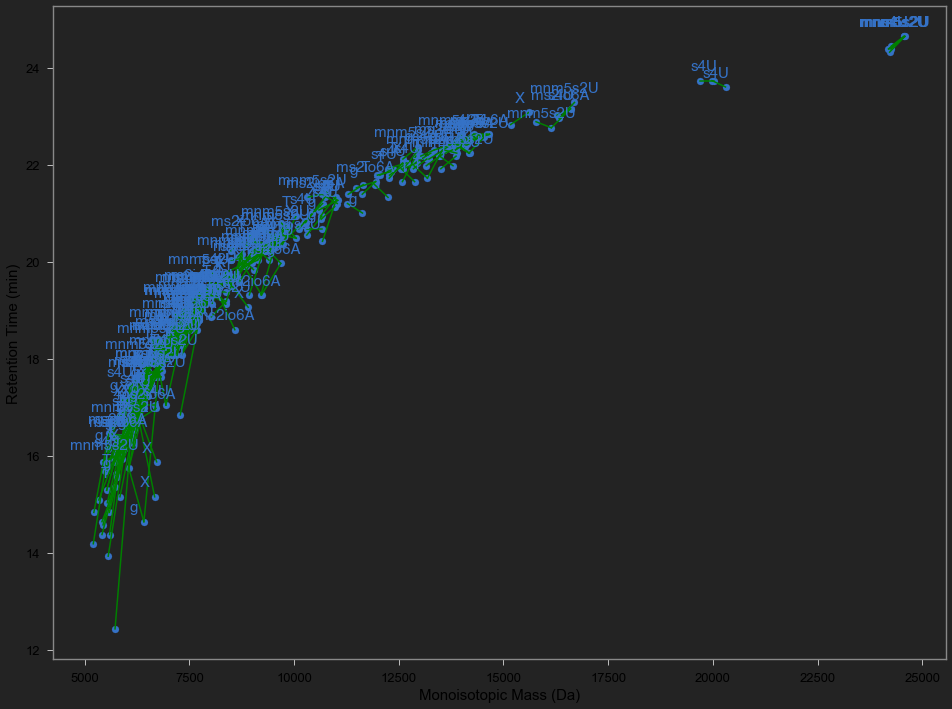

In [164]:
bcr = base_calling_random(df_c_main, silence=True)
plot_basecalling(*bcr, annotate=False)
len(bcr[1])

In [165]:
print(len([i for i in bcr[1] if i[2] == 'mnm5s2U']),
len([i for i in bcr[1] if i[2] == 'X']),
len([i for i in bcr[1] if i[2] == 'T']),
len([i for i in bcr[1] if i[2] == 'g']),
len([i for i in bcr[1] if i[2] == 's4U']),
len([i for i in bcr[1] if i[2] == 'ms2io6A']))

45 47 76 50 51 22


In [109]:
%run ../../modules/utils.ipynb

In [111]:
full_mass = masses[1]
fullmass_dot_24203 = df7[(df7.Mass>full_mass-0.1) & (df7.Mass<full_mass+0.1)]
df_24203_gap_dots = find_gap_dots(df7, df_24203, fullmass_dot_24203, orientation=5, major=True)
df_24203_gap_dots.shape

Processing forward 5926.72455988079
Processing forward 7877.99154023057
components 7877.99154023057-5926.72455988079
keep this dot 7877.99154023057
6226.72455988079 7577.99154023057 17.42045933162443 19.191236199521285
Processing the gap 5926.72455988079-7877.99154023057, 212 dots
extend dots               Mass         RT       Vol
3570  6540.800736  18.016614  13124.00
4044  6232.773388  17.627310   8926.88
4365  6881.909425  17.817821   7338.03
4617  6497.877552  17.627310   6453.93
4637  6575.881124  17.428509   6329.99
5646  6858.929001  17.751556   4140.70
5967  7053.943375  18.472183   3669.46
6177  6536.896151  17.561038   3360.89
6617  6869.867865  18.596429   2884.69
6927  7227.998711  18.405918   2593.08
7143  7189.952994  18.472183   2354.45
7199  6751.893875  18.149143   2310.98
8062  6906.955419  18.082879   1707.37
8087  6913.951302  18.082879   1687.46
8605  7203.957324  18.273390   1416.21
9396  7573.024974  18.728958    957.40
9559  6922.934308  17.884085    852.54
968

(66, 3)

In [112]:
plotly_zones(df_24203, df_24203_gap_dots)

In [ ]:
dots_in_mid_gap()

In [13]:
# masses = [24288.17982, 24302.1913, 24316.12684, 24330.1247, 24344.13365] 
# masses = [24189.22295, 24203.25458, 24245.22615]
masses = [24189.23, 24203.24, 24217.27, 24231.25]

df_ms_list = list()
df_common = pd.DataFrame()
for idx in range(1, len(masses)):
    df_ms_1, _ = computational_data_seperation(df2, df2, full_mass=masses[idx-1], ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df2, df2, full_mass=masses[idx], ignore_endpoints=True)
    df_comm = df_ms_1[df_ms_1.Mass.isin(df_ms_2.Mass)]
    plotly_zone(df_comm)

full_mass 24189.23 sum_value 24207.2
full_mass 24203.24 sum_value 24221.3


full_mass 24203.24 sum_value 24221.3
full_mass 24217.27 sum_value 24235.3


full_mass 24217.27 sum_value 24235.3
full_mass 24231.25 sum_value 24249.3


In [157]:
# full_mass = df_big.iloc[0].Mass
# full_mass = 23277.1 #23281.1 #24206.2 #24330.2261
# full_mass = 23595.15 #24234.26
full_mass = 24203.26029 #24189.22863 #24330.1247 #24201.18331 #24330.1247 #24302.19227 #23057.09
print(full_mass)
df_ms_3, df_ms_5  = computational_data_seperation(df7, df7, full_mass=full_mass, ignore_endpoints=True)
# df_ms.shape
plotly_zones(df_ms_3, df_ms_5)

24203.26029
full_mass 24203.26029 sum_value 24221.3


mass_x (88,) mass_y (88,)


(<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1152x864 with 1 Axes>)

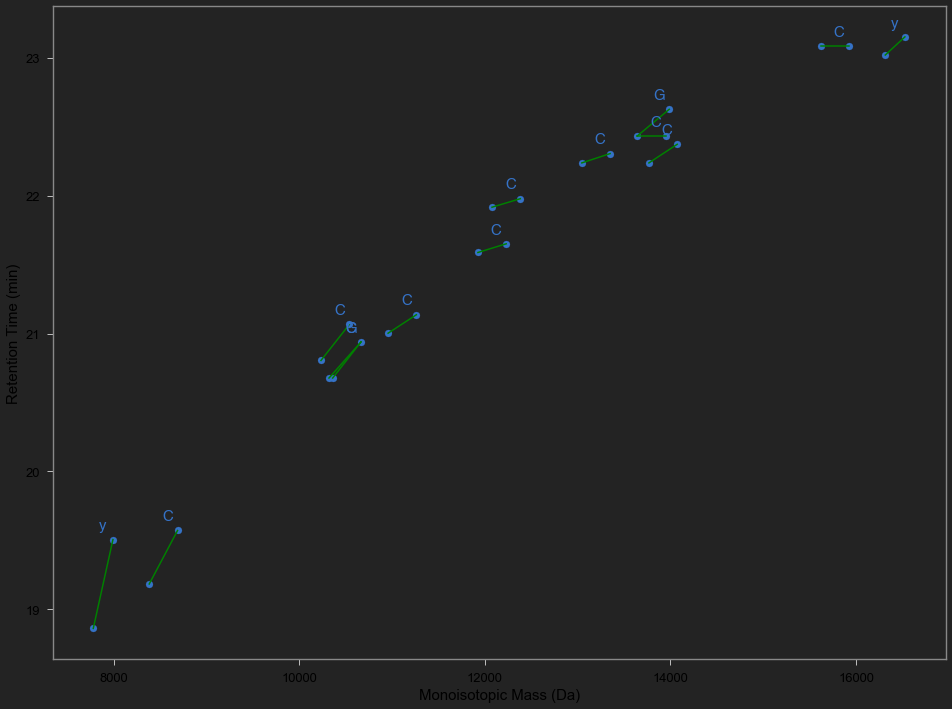

In [120]:
df_ms_bcr, mass_pairs = base_calling_random(df_ms)
df_ms_bcr.shape, len(mass_pairs)
plot_basecalling(df_ms_bcr, mass_pairs, annotate=False)

(22, 25)

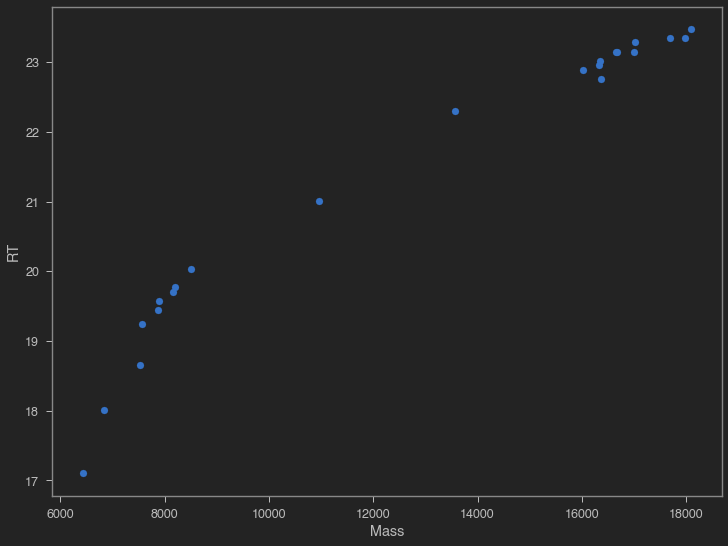

In [101]:
mass_3p = [pair[0] for pair in mass_pairs]
mass_5p = [pair[1] for pair in mass_pairs]
mass_3p5p = set(mass_3p) & set(mass_3p)
mass_3ponly = set(mass_3p) - set(mass_5p)
mass_5ponly = set(mass_5p) - set(mass_3p)
mass_else = mass_3ponly | mass_5ponly

df_mass_3p5p = df_ms_bcr[df_ms_bcr.Mass.isin(mass_3p5p)]
# plot_zone(df_mass_3p5p)
# plot_zone(df_ms_bcr[df_ms_bcr.Mass.isin(mass_else)])
plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df_mass_3p5p.Mass, df_mass_3p5p.RT)
len(mass_3p5p), len(mass_else)
# plt.savefig('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min_skeleton_1.png', transparent=True)

#    Rank to get the full mass value

In [103]:
df_glu = df7[df7.Mass > 1500]

In [104]:
df_glu = df2[df2.Mass > 2329]

In [105]:
df3p_mass_np = np.array(df_glu['Mass'])
df5p_mass_np = np.array(df_glu['Mass'])
mass_sum_np = df3p_mass_np[:, np.newaxis] + df5p_mass_np
mass_sum_0 = np.round(mass_sum_np, 0)
mass_sum_1 = np.round(mass_sum_np, 1)
mass_sum_2 = np.round(mass_sum_np, 2)
mass_sum_3 = np.round(mass_sum_np, 3)

In [106]:
res1 = np.unique(mass_sum_1, return_counts=True)
res2 = np.unique(mass_sum_2, return_counts=True)
res3 = np.unique(mass_sum_3, return_counts=True)

In [107]:
res1_s0 = pd.Series(res1[0])
res1_s1 = pd.Series(res1[1])

res2_s0 = pd.Series(res2[0])
res2_s1 = pd.Series(res2[1])

res3_s0 = pd.Series(res3[0])
res3_s1 = pd.Series(res3[1])

In [108]:
res1_s1_max = np.max(res1_s1)
res1_s2_max = np.max(res2_s1)
res1_s3_max = np.max(res3_s1)
print("max s1 {} s2 {} s3 {}".format(res1_s1_max, res1_s2_max, res1_s3_max))

max s1 584 s2 136 s3 30


In [109]:
res1_idxs = res1_s1[res1_s1 > 400].index
res1_s0[res1_idxs]
l = list(zip(res1_s0[res1_idxs], res1_s1[res1_idxs]))
[i for i in l if i[0] > 23000]

[(23000.1, 406),
 (23015.1, 410),
 (23057.1, 406),
 (23141.1, 402),
 (23289.1, 402),
 (23902.2, 420)]

In [110]:
res2_idxs = res2_s1[res2_s1 > 80].index
l = list(zip(res2_s0[res2_idxs], res2_s1[res2_idxs]))
[i for i in l if i[0] > 23000]

[(23057.09, 82), (23359.13, 82), (23393.14, 86), (23957.2, 82)]

In [111]:
res3_idxs = res3_s1[res3_s1 > 10].index
l = list(zip(res3_s0[res3_idxs], res3_s1[res3_idxs]))

# Top vols

In [112]:
plotly_zone(df_glu)

In [113]:
df_glu = df_glu.sort_values('Vol', ascending=False)

In [114]:
df_top = df_glu[(df_glu.Mass > 11000) & (df_glu.Mass < 20000)][:500]

In [116]:
plotly_zone(df_top)

# Glu DataSet 7

In [90]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_draw = df7[(df7.Mass > 5000) & (df7.Mass < 22000)]
# df_draw = df7_chosen[:100] #df7
x = df_draw.Mass
y = df_draw.RT
fig = go.Scatter(x=x, y=y, mode='markers')
# fig.update_layout(width=1024, height=768)
f = go.FigureWidget(fig)
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'c34cb47…

points [22, 27, 37, 47, 50, 58, 68, 70, 71, 76, 79, 90, 96, 108, 117, 120, 122, 127, 129, 130, 137, 140, 142, 145, 149, 166, 176, 177, 178, 194, 195, 197, 198, 206, 248, 249, 252, 256, 274, 275, 276, 287, 290, 294, 321, 340, 356, 380, 395, 409, 448, 451, 483, 486, 490, 496, 501, 505, 509, 519, 529, 535, 546, 554, 556, 567, 568, 574, 585, 593, 599, 610, 612, 630, 634, 643, 650, 653, 654, 661, 663, 665, 695, 696, 704, 707, 718, 723, 731, 732, 741, 744, 745, 747, 766, 767, 778, 782, 791, 793, 797, 800, 803, 805, 806, 808, 815, 821, 823, 827, 831, 832, 834, 842, 847, 856, 862, 863, 867, 875, 879, 892, 896, 903, 907, 910, 911, 912, 916, 920, 935, 938, 944, 949, 955, 956, 964, 969, 973, 974, 975, 986, 987, 990, 992, 998, 1004, 1010, 1011, 1017, 1023, 1024, 1026, 1030, 1033, 1038, 1039, 1040, 1041, 1047, 1051, 1056, 1058, 1062, 1064, 1065, 1066, 1070, 1074, 1075, 1076, 1080, 1084, 1086, 1092, 1100, 1103, 1104, 1105, 1110, 1113, 1117, 1121, 1126, 1138, 1145, 1148, 1152, 1155, 1159, 1163, 1164,

In [88]:
df7_1 = df_draw.iloc[idxs]
df7_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1584 to 10160
Data columns (total 4 columns):
Unnamed: 0    947 non-null int64
Mass          947 non-null float64
RT            947 non-null float64
Vol           947 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 37.0+ KB


mass_x (100,) mass_y (100,)


(<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1152x864 with 1 Axes>)

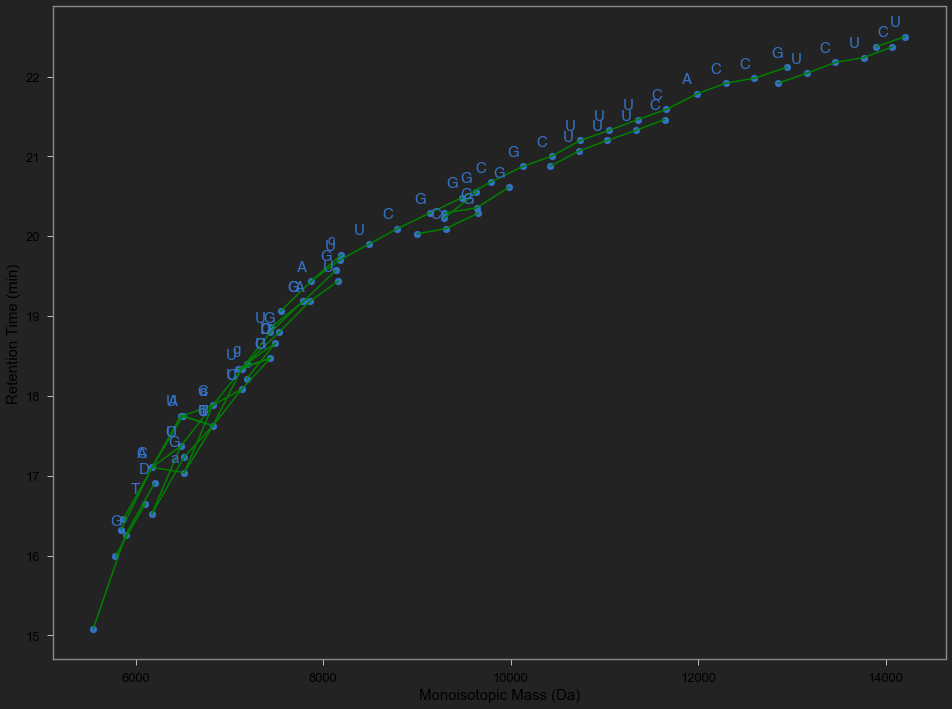

In [89]:
bcr_5p = base_calling_random(df7_1[:100])
plot_basecalling(*bcr_5p, annotate=False)

In [796]:
df7_chosen = df_draw.iloc[idxs]
df7_chosen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1584 to 3795
Data columns (total 4 columns):
Unnamed: 0    47 non-null int64
Mass          47 non-null float64
RT            47 non-null float64
Vol           47 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [797]:
df7_chosen = df7_chosen.sort_values('Vol', ascending=False)

mass_x (47,) mass_y (47,)
df3_idxs 6 df5_idxs 6
df3_idxs 3 df5_idxs 3
df3_idxs 9 df5_idxs 9
df3_idxs 8 df5_idxs 8
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1


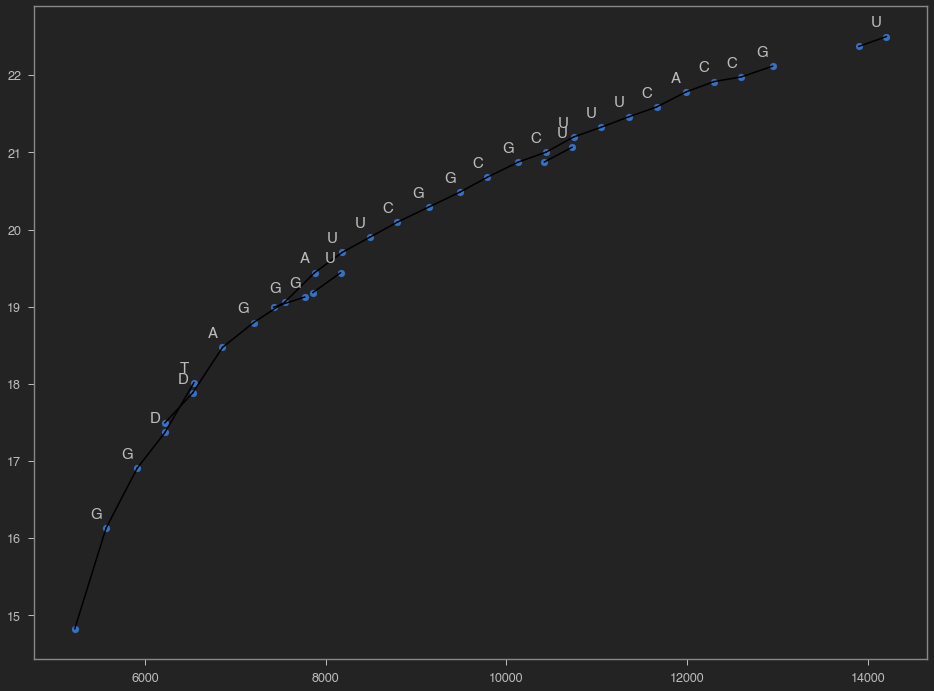

In [977]:
bcr_5p = base_calling_random(df7_chosen[:100])
plot_basecalling(*bcr_5p, annotate=True)

# Glu Dataset 2

In [1049]:
df2_top = df2[(df2.Mass > 2300) & (df2.Mass < 22000)].sort_values('Vol').groupby('RT').tail(1)

In [1050]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_draw = df2[(df2.Mass > 12329) & (df2.Mass < 22000) & (df2.RT < 25) & (df2.RT > 8)]
# df_draw = df2_chosen[:100] #df7
df_draw = df2_top[(df2_top.RT < 25) & (df2_top.RT > 8)]
x = df_draw.Mass
y = df_draw.RT
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'e97d0e0…

points [2, 4, 7, 9, 15, 17, 18, 19, 21, 22, 24, 26, 29, 30, 31, 32, 35, 36, 37, 39, 40, 42, 46, 48, 50, 54, 55, 56, 58, 59, 60, 61, 69, 70, 74, 76, 84, 88, 91, 92, 95, 96, 97, 100, 104, 106, 107, 113, 114, 115, 124, 125, 127, 130, 131, 133, 145, 146, 148, 153, 157, 159, 161, 162, 164, 173, 175, 177, 179, 180, 182, 184, 185, 186, 187, 189, 190, 194, 196, 197, 198, 202, 203, 204, 206]


In [1051]:
df2_chosen = df_draw.iloc[idxs]
df2_chosen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 19484 to 984
Data columns (total 4 columns):
Unnamed: 0    85 non-null int64
Mass          85 non-null float64
RT            85 non-null float64
Vol           85 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [1052]:
df2_chosen = df2_chosen.sort_values('Vol', ascending=False)

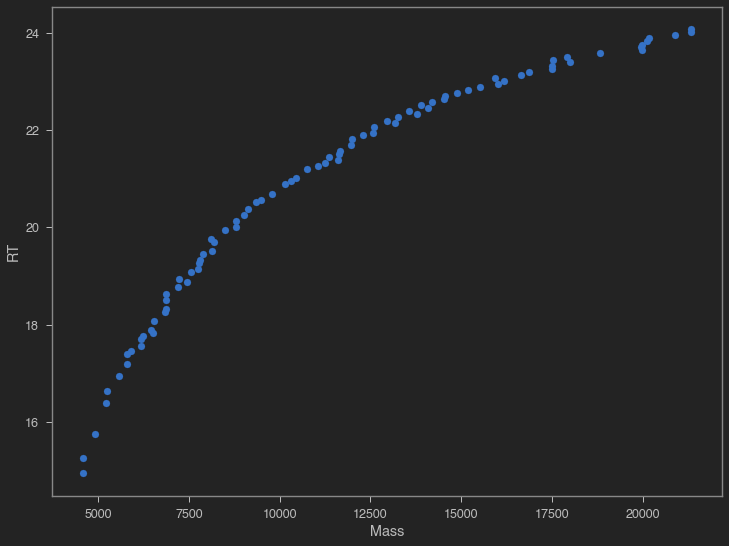

In [1053]:
plot_zone(df2_chosen[:100])

mass_x (85,) mass_y (85,)
df3_idxs 11 df5_idxs 11
df3_idxs 3 df5_idxs 3
df3_idxs 10 df5_idxs 10
df3_idxs 6 df5_idxs 6
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1


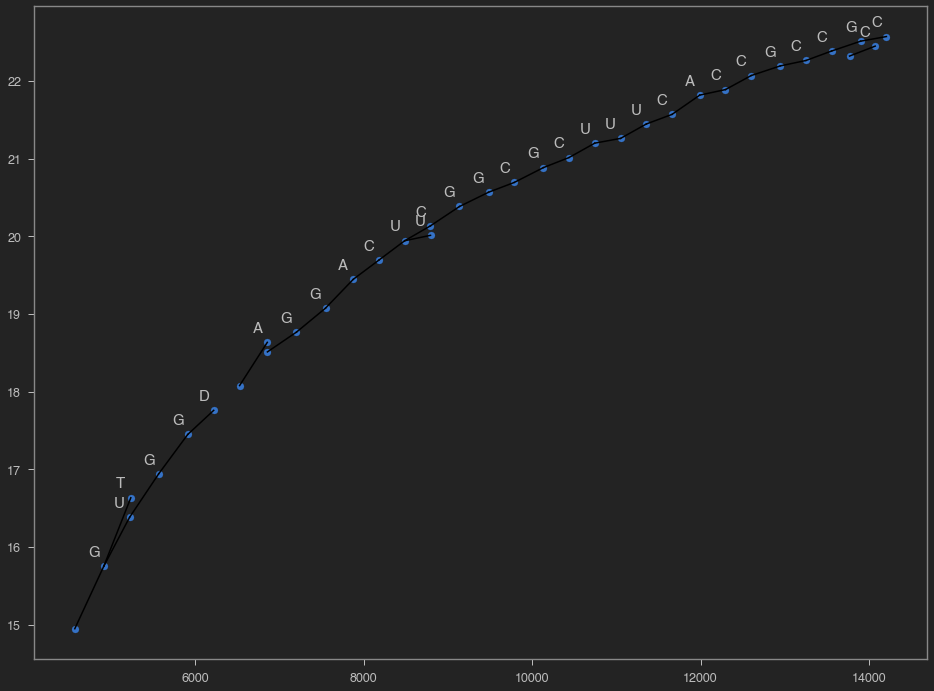

In [1054]:
bcr_5p = base_calling_random(df2_chosen[:100])
plot_basecalling(*bcr_5p, annotate=True)

In [965]:
# df2_chosen.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/S2to5combined_20ul_40min_skeleton_1.xlsx')
df2_chosen = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/S2to5combined_20ul_40min_skeleton_1.xlsx')

In [966]:
df2_chosen = df2_chosen.sort_values('Mass', ascending=True)
df2_chosen.tail()

,Unnamed: 0,Unnamed: 0.1,Mass,RT,Vol
44,2797,2797,12295.599498,21.889760,66612.39
45,3194,3194,12600.646249,22.070214,49808.08
46,3680,3680,13250.709059,22.264293,40910.71
47,3149,3149,13555.752024,22.386297,51917.38
48,3892,3892,14205.850048,22.572476,38356.77


In [946]:
df2_exclude_h2o = df2_chosen
df2_exclude_h2o.Mass = df2_exclude_h2o.Mass - 18.0106

In [957]:
df2_exclude_h2o_restricted = df2_exclude_h2o[(df2_exclude_h2o.Mass > 8000) & (df2_exclude_h2o.Mass < 11000)]
df2_exclude_h2o_restricted.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/S2to5combined_20ul_40min_skeleton_h2o_8k_11k.xlsx')

In [967]:
df2_chosen_restricted = df2_chosen[(df2_chosen.Mass > 8000) & (df2_chosen.Mass < 11000)]
df2_chosen_restricted.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/S2to5combined_20ul_40min_skeleton_8k_11k.xlsx')